In [1]:
import numpy as np
from numpy.random import random
from scipy import interpolate
import matplotlib.pyplot as plt
import random

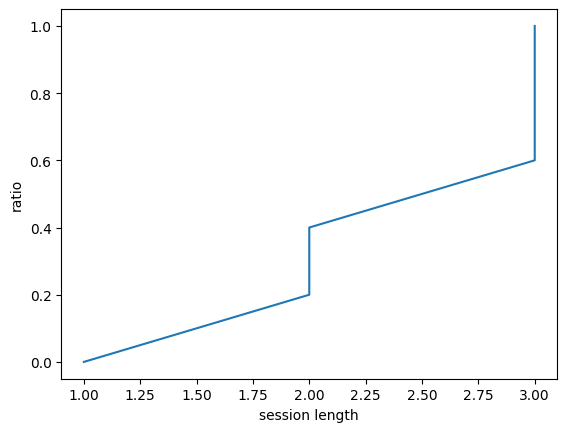

In [86]:
x = [1,2,2,3,3,3]
x.sort()         # O(NlogN)
nobs = len(x)
y = np.linspace(0, 1, nobs)
fig,ax = plt.subplots()
ax.set_xlabel('session length')
ax.set_ylabel('ratio')
ax.plot(x, y)
plt.show() 

In [87]:
cdf = np.cumsum(x)    # cumulative distribution function of a random variable
cdf = cdf/cdf.max()   # normalizing cdf to 1.0

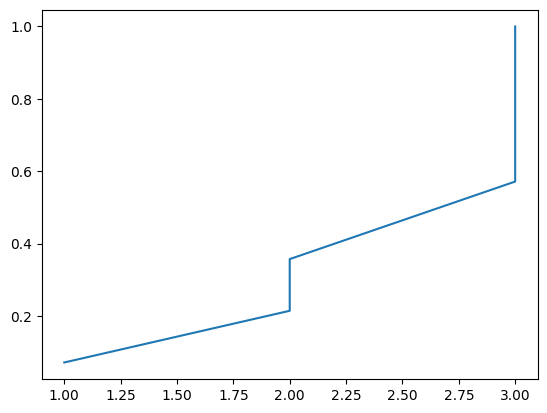

In [88]:
ax.set_xlabel('session length')
ax.set_ylabel('probability')
plt.plot(x, cdf)
plt.show()

In [89]:
inverse_cdf = interpolate.interp1d(cdf, x, fill_value=min(x), bounds_error=False, assume_sorted=False)    # this is a function

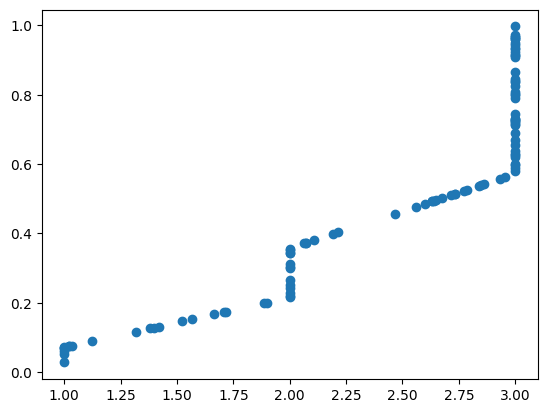

In [90]:
y2 = [random.random() for _ in range(100)]
x2 = inverse_cdf(y2)
plt.scatter(x2, y2)
plt.show()

In [100]:
p=80
print(inverse_cdf([p/100.0]))
print(np.percentile(x, [p]))

[3.]
[3.]


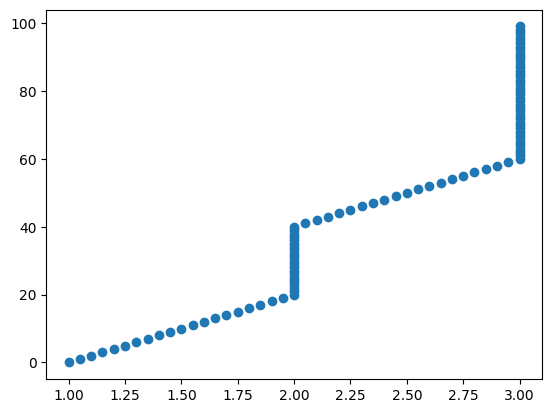

In [85]:
y2 = [i for i in range(100)]
x2 = np.percentile(x, y2)
plt.scatter(x2, y2)
plt.show()

In [65]:
inverse_cdf2 = interpolate.interp1d(y, x, fill_value=min(x), bounds_error=False, assume_sorted=False)    # this is a function

In [66]:
p=5

In [71]:
inverse_cdf2([p/100.0])

array([1.])

In [72]:
np.percentile(x, [p])

array([1.25])

In [102]:
import pandas as pd

In [103]:
df = pd.read_csv('D:\\git\\data\\bolcom-clicks-35m_test.txt', sep='\t')
df

,SessionId,Time,ItemId
0,0008019740_18,1585897352,9200000083733268
1,0008019740_18,1585897382,9200000049819763
2,0008019740_18,1585897392,9200000066323079
3,0008019740_18,1585897506,9200000081546242
4,0008019740_18,1585897633,9200000125623273
...,...,...,...
1211470,zzz7jpx6h6yk34srl558w4zg2eu4h4pm_1,1585921127,9200000065118578
1211471,zzz7jpx6h6yk34srl558w4zg2eu4h4pm_1,1585921160,9200000065118570
1211472,zzz7jpx6h6yk34srl558w4zg2eu4h4pm_1,1585921286,9200000064417495
1211473,zzzjsuzmx87wcp4720be75zq67m2hkx9_14,1585944407,9200000026328200


In [104]:
x = np.array(df.groupby('SessionId').size())

In [105]:
x.mean()

6.381591769868152

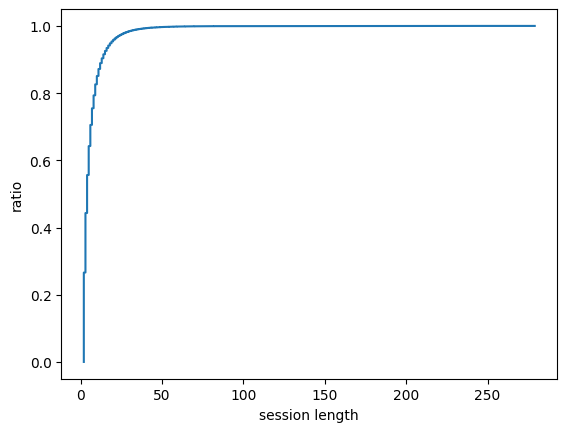

In [106]:
x.sort()         # O(NlogN)
nobs = len(x)
y = np.linspace(0, 1, nobs)
fig,ax = plt.subplots()
ax.set_xlabel('session length')
ax.set_ylabel('ratio')
ax.plot(x, y)
plt.show() 

In [107]:
cdf = np.cumsum(x)    # cumulative distribution function of a random variable
cdf = cdf/cdf.max()   # normalizing cdf to 1.0

In [108]:
x.sort()
inverse_cdf = interpolate.interp1d(cdf, x, fill_value=min(x), bounds_error=False, assume_sorted=True)    # this is a function

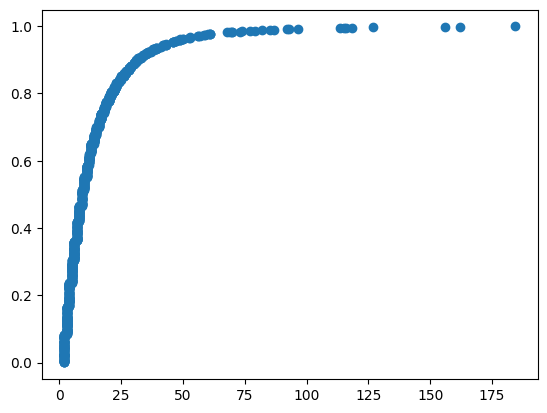

In [109]:
y2 = [random.random() for _ in range(1000)]
x2 = inverse_cdf(y2)
plt.scatter(x2, y2)

In [57]:
q=.6
print(inverse_cdf(q))
print(np.percentile(x, q * 100))

12.0
5.0


In [58]:
x[-50:]

array([110, 110, 111, 111, 111, 112, 113, 113, 113, 114, 115, 115, 116,
       117, 117, 118, 119, 120, 123, 124, 124, 125, 125, 126, 127, 129,
       130, 130, 131, 136, 137, 138, 141, 150, 150, 151, 152, 156, 156,
       156, 159, 168, 174, 179, 184, 188, 199, 225, 246, 279], dtype=int64)

In [59]:
https://stats.stackexchange.com/questions/132952/is-calculating-a-percentile-the-same-as-evaluating-a-cumulative-density-function

SyntaxError: invalid syntax (1740189805.py, line 1)

In [60]:
x

array([  2,   2,   2, ..., 225, 246, 279], dtype=int64)

In [61]:
unique, counts = np.unique(x, return_counts=True)

In [62]:
unique, counts

(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
         67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
         80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
         93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
        106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
        119, 120, 123, 124, 125, 126, 127, 129, 130, 131, 136, 137, 138,
        141, 150, 151, 152, 156, 159, 168, 174, 179, 184, 188, 199, 225,
        246, 279], dtype=int64),
 array([50468, 33628, 21486, 16344, 11964,  9386,  7310,  6219,  4725,
         3955,  3303,  2718,  2283,  1917,  1642,  1389,  1246,  1053,
          955,   794, 

In [63]:
prob=counts/sum(counts)
prob

array([2.65846322e-01, 1.77139576e-01, 1.13180116e-01, 8.60940060e-02,
       6.30218238e-02, 4.94418955e-02, 3.85063132e-02, 3.27593382e-02,
       2.48895116e-02, 2.08334431e-02, 1.73989539e-02, 1.43173953e-02,
       1.20259799e-02, 1.00980304e-02, 8.64943452e-03, 7.31672628e-03,
       6.56345640e-03, 5.54680545e-03, 5.03057854e-03, 4.18249148e-03,
       3.85589895e-03, 3.23958723e-03, 2.73916319e-03, 2.56006405e-03,
       2.36516206e-03, 2.01749904e-03, 1.91214661e-03, 1.68563888e-03,
       1.45386354e-03, 1.28003203e-03, 1.27476441e-03, 1.04825668e-03,
       8.74425171e-04, 8.84960414e-04, 7.16396525e-04, 6.47917446e-04,
       7.37467012e-04, 5.79438366e-04, 5.10959287e-04, 5.42565016e-04,
       4.42480207e-04, 4.53015450e-04, 3.37127777e-04, 2.79183940e-04,
       2.73916319e-04, 3.63465884e-04, 2.94986805e-04, 2.73916319e-04,
       2.15972482e-04, 2.00169617e-04, 1.36958159e-04, 1.52761024e-04,
       1.63296267e-04, 1.15887673e-04, 1.36958159e-04, 1.31690538e-04,
      

In [111]:
cdf = np.cumsum(prob)    # cumulative distribution function of a random variable

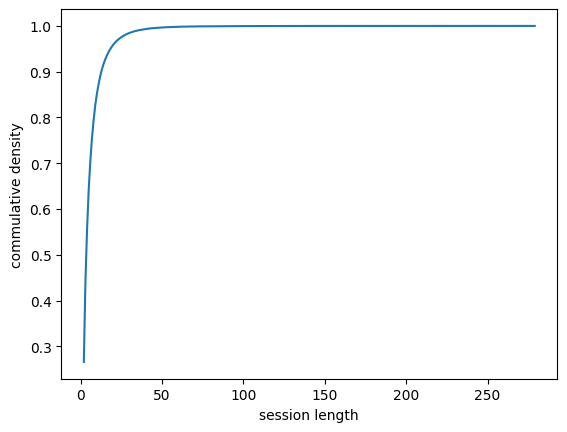

In [132]:
plt.plot(unique, cdf)
plt.xlabel('session length')
plt.ylabel('commulative density')
plt.show()

In [133]:
inverse_cdf = interpolate.interp1d(cdf, unique, fill_value=min(unique), bounds_error=False, assume_sorted=True)    # this is a function

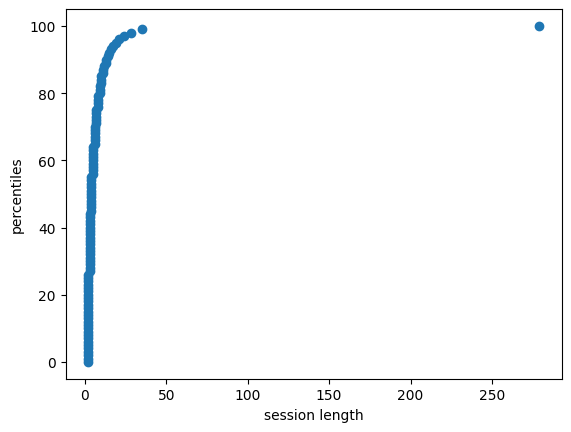

In [135]:
y2 = [i for i in range(101)]
x2 = np.percentile(x, y2)
plt.scatter(x2, y2)
plt.xlabel('session length')
plt.ylabel('percentiles')
plt.show()

Essentially, calculating a percentile (or a p-quantile) is equivalent to finding the inverse of a CDF.

In [137]:
q=.5
print(inverse_cdf(q))
print(np.percentile(x, q * 100))

3.5037466257097645
4.0
